# Embeddings Visualizations

**1. 2D t-SNE Visualization of Embeddings**


Objective: Visualizing how reviews are clustered based on semantic similarity using t-SNE.



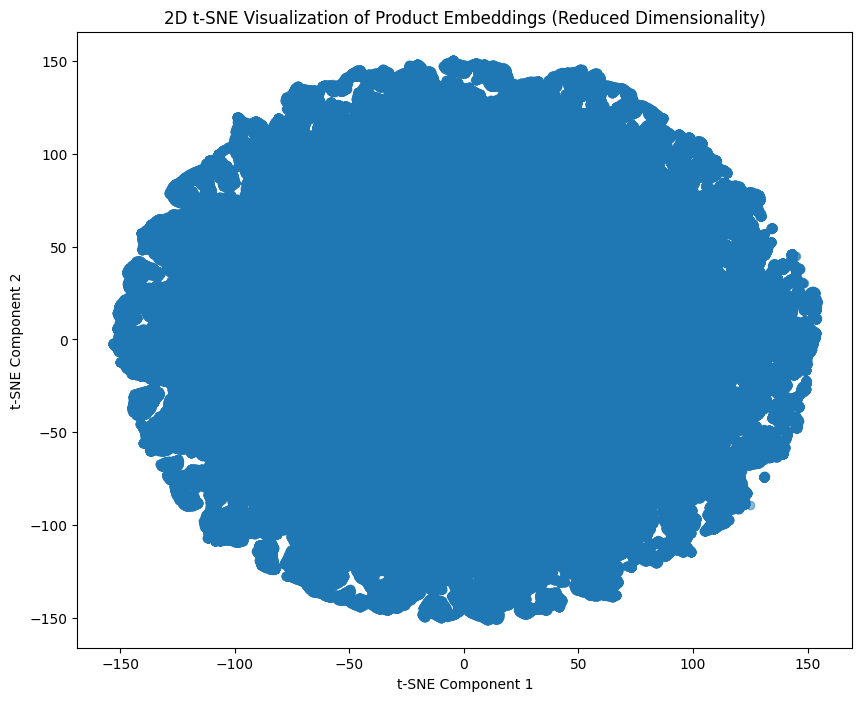

In [3]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load your embeddings data
df = pd.read_csv('data/df_user_embeddings_BERT.csv')

# Extract a smaller range of dimensions (e.g., 758-759)
embedding_cols = [f'dim_{i}' for i in range(758, 760)]  # Only two dimensions for t-SNE
embeddings = df[embedding_cols].values

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Adding product ID for visualization
df['tsne_1'] = tsne_results[:, 0]
df['tsne_2'] = tsne_results[:, 1]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['tsne_1'], df['tsne_2'], alpha=0.5)

# Optionally color by product or rating
# plt.colorbar(df['rating'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Visualization of Product Embeddings (Reduced Dimensionality)')
plt.show()



**2. Heatmap of Pairwise Similarities**


Objective: Visualizing sentiment or semantic similarity between reviews using a correlation matrix or cosine similarity heatmap.



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load your embeddings data
df = pd.read_csv('data/df_user_embeddings_BERT.csv')

# Extract embeddings
embedding_cols = [f'dim_{i}' for i in range(758, 760)]
embeddings = df[embedding_cols].values

# Compute cosine similarity
similarity_matrix = cosine_similarity(embeddings)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', annot=False)
plt.title('Cosine Similarity Heatmap of Product Embeddings')
plt.show()


: 

**3. Embedding Clustering using KMeans**


Objective: Clustering reviews based on BERT embeddings to group similar reviews together.



/Users/daianaszymczyk/Desktop/neuefische/Capstone-Project-Recommender-System/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


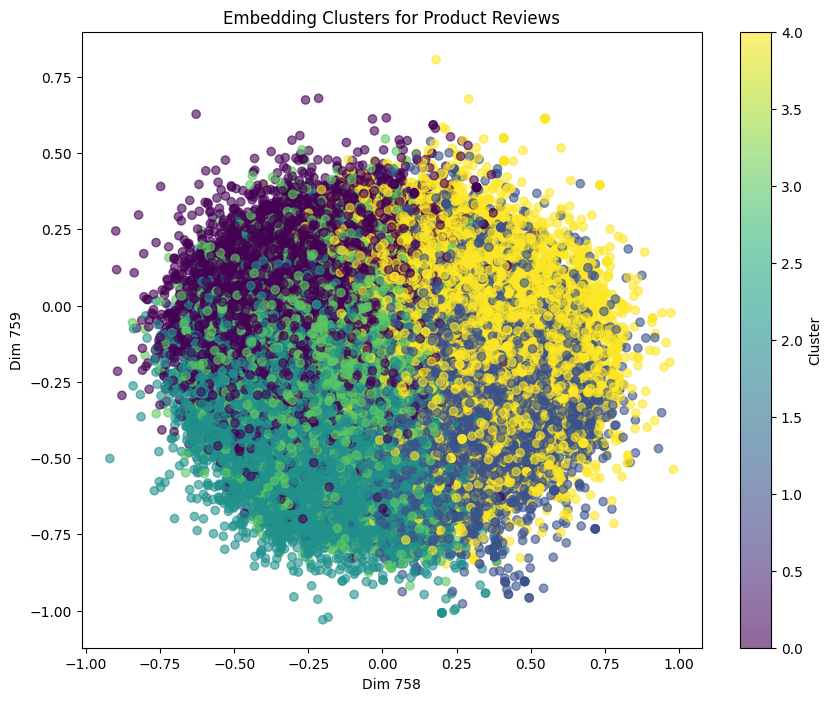

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load embeddings
df = pd.read_csv('data/df_user_embeddings_BERT.csv')
embedding_cols = [f'dim_{i}' for i in range(758, 768)]
embeddings = df[embedding_cols].values

# Fit KMeans
kmeans = KMeans(n_clusters=5, random_state=42)  # Choose the number of clusters as per analysis
df['cluster'] = kmeans.fit_predict(embeddings)

# Plot clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['dim_758'], df['dim_759'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Dim 758')
plt.ylabel('Dim 759')
plt.title('Embedding Clusters for Product Reviews')
plt.colorbar(label='Cluster')
plt.show()


### Explanation of the Plot

This scatter plot visualizes the results of applying K-Means clustering to a dataset of product review embeddings. Here's a breakdown of what the plot represents:


**Axes (Dim 758 and Dim 759):**

    - The x-axis (Dim 758) and y-axis (Dim 759) represent two dimensions of the high-dimensional embeddings extracted from the product reviews. These embeddings are numerical representations of the reviews, capturing their semantic meaning.

    - The plot shows how the data points (reviews) are distributed in this 2D space.


**Clusters:**

    - Each point represents a product review, and its color corresponds to the cluster it belongs to, as determined by the K-Means algorithm.

    - The color gradient (from purple to yellow) indicates the cluster labels (0 to 4, as shown in the color bar). These clusters group reviews that are semantically similar.


**Color Bar:**

    - The color bar on the right maps the cluster labels to their respective colors. For example, reviews in cluster 0 are purple, while those in cluster 4 are yellow.


**Title and Labels:**

    - The title, "Embedding Clusters for Product Reviews," indicates that the plot shows clusters of reviews based on their embeddings.

    - The axes are labeled to show the dimensions being visualized.

### Insights for Stakeholders



**Clustering of Reviews:**

    - The plot shows that the reviews are grouped into five distinct clusters (as specified in the K-Means algorithm). Each cluster represents a group of reviews that are semantically similar.

    - For example, one cluster might represent positive reviews, another might represent negative reviews, and others could capture specific themes or topics.


**Overlap and Separation:**

    - Some clusters are well-separated (e.g., the yellow cluster on the right), while others overlap slightly (e.g., the green and purple clusters). This indicates that while some groups of reviews are very distinct, others share similarities.


**Dimensionality Reduction:**

    - Although the embeddings are high-dimensional, this plot reduces them to two dimensions (Dim 758 and Dim 759) for visualization. This simplification helps us see the general structure of the clusters but may not capture all the nuances of the data.


**Actionable Insights:**

    - These clusters can be used to better understand customer feedback. For example:

        ° Identify common themes in reviews (e.g., recurring complaints or praises).

        ° Tailor marketing strategies or product improvements based on the characteristics of each cluster.
        
        ° Use the clusters to segment customers for personalized recommendations or targeted campaigns.

**4. PCA - Principal Component Analysis**

This approach is for reducing dimensions and visualizing clusters or patterns.

It's goal is to reduce dimension to 2 or 3 for visual exploration of clusters or patterns.

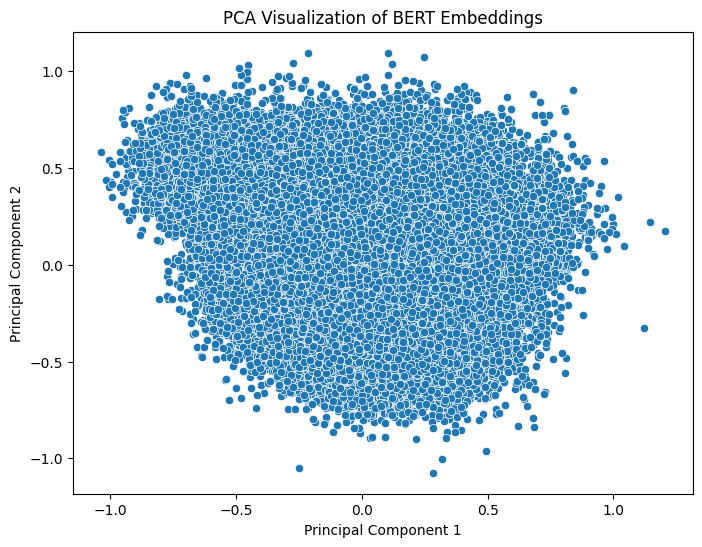

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load embeddings
embeddings_path = 'data/df_user_embeddings_BERT.csv'
df_embeddings = pd.read_csv(embeddings_path)

# Assuming the embeddings start from the 10th column (dim_758 onward)
features = [f'dim_{i}' for i in range(758, 768)] 

# Extract features
X = df_embeddings[features]

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
pca_result = pca.fit_transform(X)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA Visualization of BERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**5. UMAP - Uniform Manifold Approximation and Projection**

In [8]:
pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 6.1 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


/Users/daianaszymczyk/Desktop/neuefische/Capstone-Project-Recommender-System/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


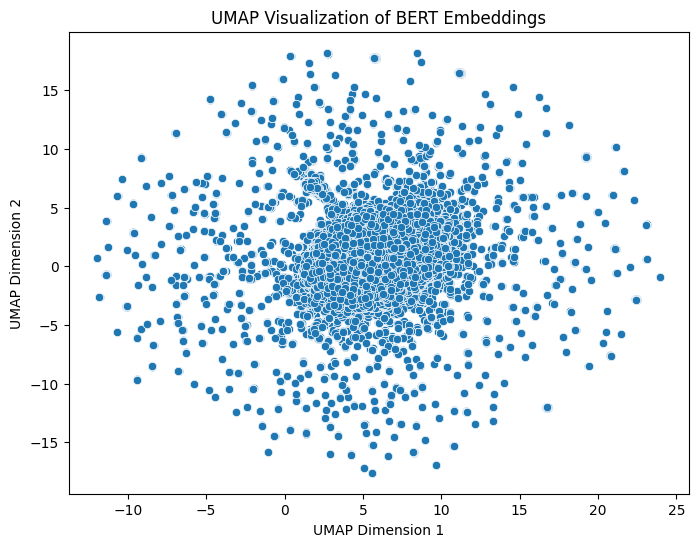

In [9]:
import umap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load embeddings
df_embeddings = pd.read_csv(embeddings_path)

# Extract features
features = [f'dim_{i}' for i in range(758, 768)]  # Adjust dimensions if necessary
X = df_embeddings[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform UMAP
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(X_scaled)

# Convert to DataFrame
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df)
plt.title('UMAP Visualization of BERT Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()


**6. t-SNE - t-Distributed Stochastic Neighbour Embeddings**

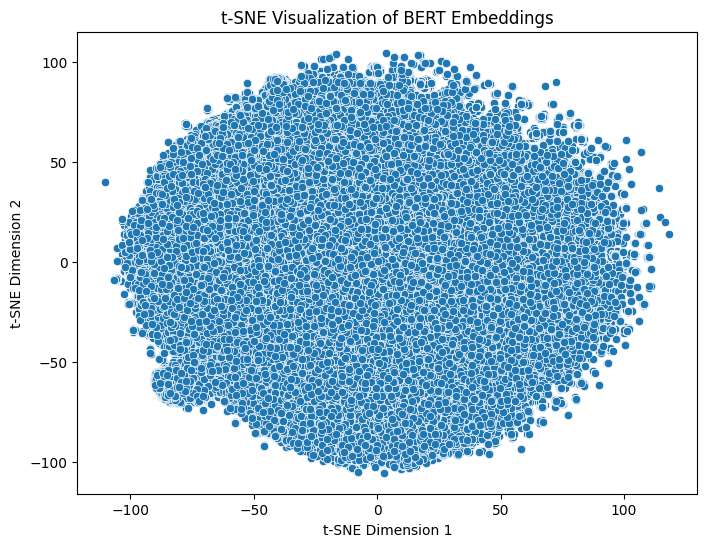

In [10]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load embeddings
embeddings_path = 'data/df_user_embeddings_BERT.csv'
df_embeddings = pd.read_csv(embeddings_path)

# Extract features
features = [f'dim_{i}' for i in range(758, 768)]  # Adjust dimensions if necessary
X = df_embeddings[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne_model = TSNE(n_components=2, random_state=42)
tsne_result = tsne_model.fit_transform(X_scaled)

# Convert to DataFrame
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_df)
plt.title('t-SNE Visualization of BERT Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

